In [1]:
import yfinance as yf

In [2]:
ticker = 'BTC-USD'

data = yf.download(ticker, auto_adjust=True, start = '2020-01-01')

[*********************100%%**********************]  1 of 1 completed


In [3]:
import sys
sys.path.append("../")
sys.path.append("../algo_trader")

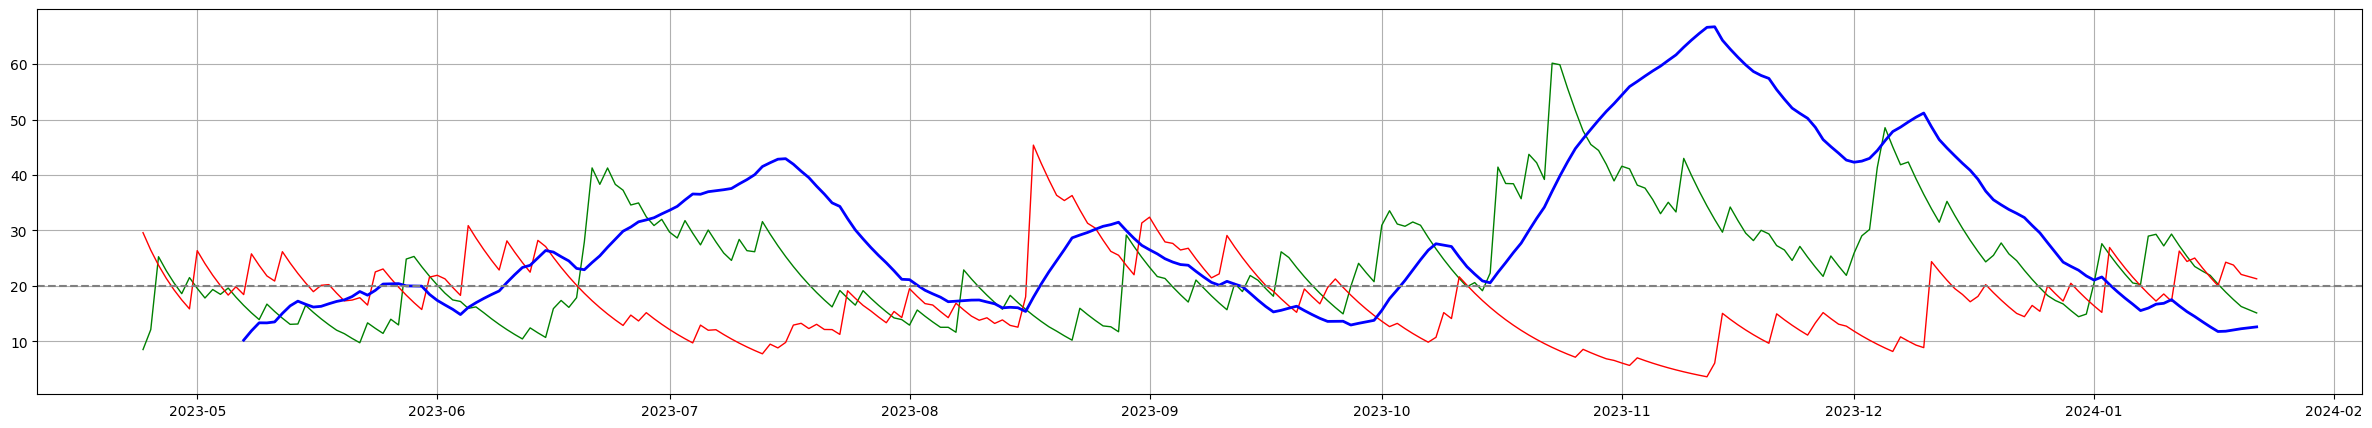

In [4]:
from algo_trader.lib.indicators.dmi import DMI

df = data.iloc[-300:]
adx_threshold = 20
dmi = DMI(14, adx_threshold)
dmi.calculate(df)
dmi.plot()

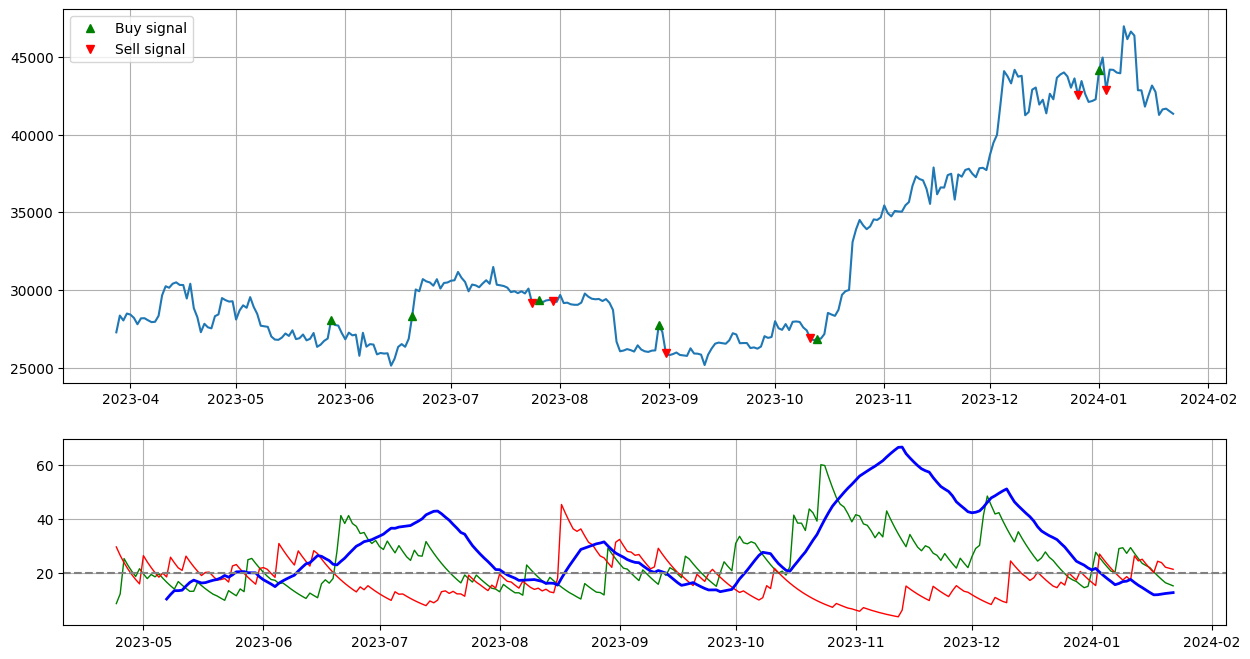

In [5]:
import matplotlib.pyplot as plt

# Armo los dos subgráficos con subplots
# figsize: Es la dimensión de toda la figura, que contiene los subgráficos
# nrows: Es la cantidad de subgráficos
# height_ratios: Se coloca la proporción de alturas entre los subgráficos (la cantidad de elementos debe coincidir con las nrows ingresadas)
fig, ax = plt.subplots(figsize=(15,8), nrows=2, gridspec_kw={'height_ratios' : [2,1]})

df = dmi.calculate(df)
df['buy_signal'] = dmi.calc_buy_signals()
df['sell_signal'] = dmi.calc_sell_signals()
buySignals = df[df['buy_signal'] == True]
sellSignals = df[df['sell_signal'] == True]

ax[0].plot(df.index, df.Close)
ax[0].plot(buySignals.index, buySignals.Close, '^', label='Buy signal', color='green')
ax[0].plot(sellSignals.index, sellSignals.Close, 'v', label='Sell signal', color='red')
ax[0].legend(loc='upper left')
ax[0].grid()

ax[1].plot(df.index, df["+di"], linewidth=1, color='green')
ax[1].plot(df.index, df["-di"], linewidth=1, color='red')
ax[1].plot(df.index, df["ADX"], linewidth=2, color='blue')
ax[1].axhline(adx_threshold, linestyle='--', linewidth=1.5, color='gray')
ax[1].grid()


In [6]:
new_record = data.iloc[-1:]
dmi.predict_signal(new_record)

[DMI] Current value:
Close    41337.207031
+di         14.040486
-di         19.759911
ADX         12.913505
Name: 2024-01-22 00:00:00, dtype: float64
[DMI] ADX Threshold: 20
[DMI] Signal: Action.HOLD


<Action.HOLD: 'hold'>